## 1. Pregunta 1

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
### cargo el archivo bikes.xlsx
data = pd.read_excel('bikes.xlsx')
# data = pd.read_excel('/content/drive/MyDrive/bikes.xlsx')

In [3]:
 # reviso las columnas y si hay datos nulos
data.info()
# no tenemos valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   year        731 non-null    int64         
 3   month       731 non-null    int64         
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weather     731 non-null    int64         
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  humidity    731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  registered  731 non-null    int64         
 13  target      731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(9)
memory usage: 80.1 KB


## 1.1 Transformacion de variables categoricas a etiquetas

In [5]:
# creo diccionarios para transformar las variables

dic_season = {1: 'invierno', 2: 'primavera', 3: 'verano', 4: 'otoño'}
dic_holiday = {1: 'día festivo', 0: 'día no festivo'}
dic_weekday = {1: 'lunes', 2: 'martes', 3: 'miércoles', 4: 'jueves', 5: 'viernes', 6: 'sábado', 7: 'domingo'}
dic_workingday = {1: 'día laboral', 0: 'día no laboral'}
dic_weather= {1: 'soleado o nubosidad parcial', 2: 'nublado', 3: 'lluvioso', 4: 'tormentoso'}

In [6]:
# las funciones para codificar las columnas
def descodificacion_columnas_season(valor):
    valor = dic_season[valor]
    return valor

def descodificacion_columnas_holiday(valor):
    valor = dic_holiday[valor]
    return valor

def descodificacion_columnas_weekday(valor):
    valor = dic_weekday[valor]
    return valor

def descodificacion_columnas_workingday(valor):
    valor = dic_workingday[valor]
    return valor

def descodificacion_columnas_weather(valor):
    valor = dic_weather[valor]
    return valor

In [7]:
# aplicar las transformaciones
data['season'] = data['season'].apply(descodificacion_columnas_season)
data['holiday'] = data['holiday'].apply(descodificacion_columnas_holiday)
data['weekday'] = data['weekday'].apply(descodificacion_columnas_weekday)
data['workingday'] = data['workingday'].apply(descodificacion_columnas_workingday)
data['weather'] = data['weather'].apply(descodificacion_columnas_weather)

In [8]:
# veo como queda el dataframe
data.head()

,date,season,year,month,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed,registered,target
0,2011-01-01,invierno,2011,1,día no festivo,sábado,día no laboral,nublado,0.344167,0.363625,0.805833,0.160446,654,985
1,2011-01-02,invierno,2011,1,día no festivo,domingo,día no laboral,nublado,0.363478,0.353739,0.696087,0.248539,670,801
2,2011-01-03,invierno,2011,1,día no festivo,lunes,día laboral,soleado o nubosidad parcial,0.196364,0.189405,0.437273,0.248309,1229,1349
3,2011-01-04,invierno,2011,1,día no festivo,martes,día laboral,soleado o nubosidad parcial,0.200000,0.212122,0.590435,0.160296,1454,1562
4,2011-01-05,invierno,2011,1,día no festivo,miércoles,día laboral,soleado o nubosidad parcial,0.226957,0.229270,0.436957,0.186900,1518,1600


## 1.2 Transformacion de variable temperatura

In [9]:
# la temperatura y la temperatura de sensacion se puede obtener de la siguiente forma

def temp_celcius(temperatura):
  x = temperatura * (39-(-8)) + (-8)
  return x

def temp_celcius_sensacion(temperatura):
  x = temperatura * (50-(-16)) + (-16)
  return x

In [10]:
# aplico las transformaciones
data['temp'] = data['temp'].apply(temp_celcius)
data['atemp'] = data['atemp'].apply(temp_celcius_sensacion)

## 1.3 Transformacion de humedad a %

In [11]:
# se transformara a porcentaje buscando mantener que la columna siga siendo númerica
data['humidity'] = data['humidity']*100

## 1.4 Transformacion velocidad del viento

In [12]:
# se debe multiplicar toda la columna por 67
data['windspeed'] = data['windspeed']*67

## 1.5 Gráfico de dispersión y comentarios

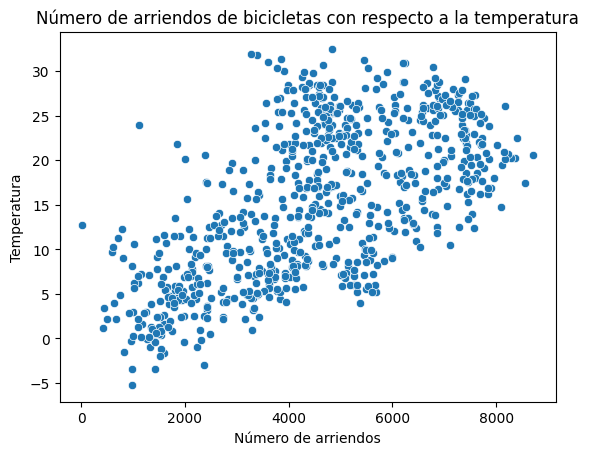

In [13]:
# debemos crear un grafico de dispersion entre el número de arriendos de bicicletas con respecto a la temperatura

sns.scatterplot(x=data['target'], y=data['temp'], data=data)
plt.title('Número de arriendos de bicicletas con respecto a la temperatura')
plt.xlabel('Número de arriendos')
plt.ylabel('Temperatura')
plt.show();

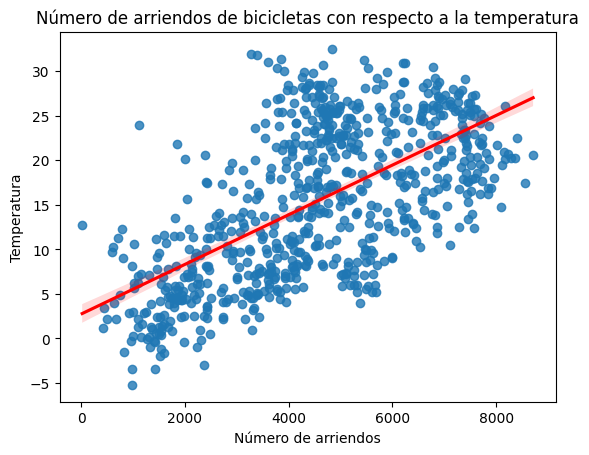

In [14]:
# Se puede ver que el número de arriendos tiende a crecer a medida que aumenta la temperatura
# agregaremos una linea de tendencia

sns.regplot(x=data['target'], y=data['temp'], data=data, line_kws={'color': 'red'})
plt.title('Número de arriendos de bicicletas con respecto a la temperatura')
plt.xlabel('Número de arriendos')
plt.ylabel('Temperatura')
plt.show();

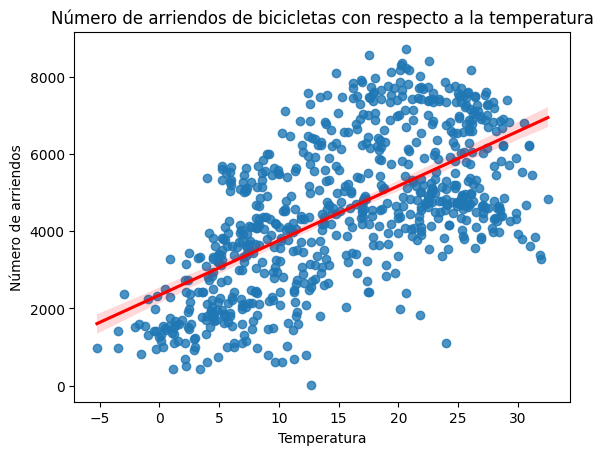

In [15]:
# con los ejes cambiados
sns.regplot(x=data['temp'], y=data['target'], data=data, line_kws={'color': 'red'})
plt.title('Número de arriendos de bicicletas con respecto a la temperatura')
plt.xlabel('Temperatura')
plt.ylabel('Número de arriendos')
plt.show();

In [16]:
# si bien el gráfico de dispersion no se ajusta muy bien a una línea recta
# podemos confirmar que existe una tendencia que a medida que aumenta la temperatura
# hay mayor cantidad de arriendos de bicicleta (esperable, dado que hay mejor clima)

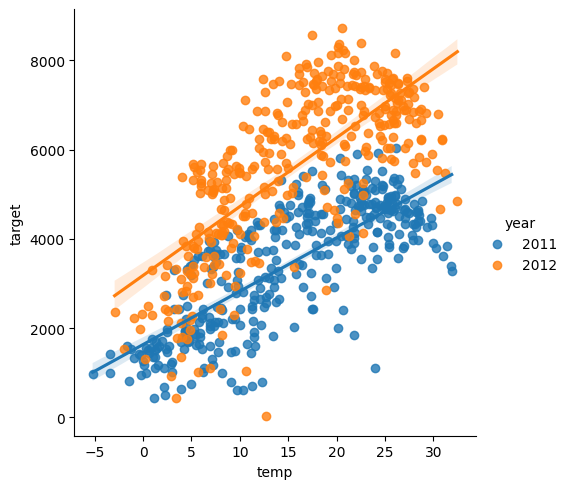

In [17]:
# una grafica que contiene la info de ambos años y para comparar la relacion
sns.lmplot(x='temp', y='target', hue='year', data=data);

In [18]:
# se puede ver que para ambos existe una relacion de cierta forma "lineal"
# sin embargo en el año 2011 la pendiente de la tendencia es más elevada que la del 2012
# lo que indica que la tasa de crecimiento de la temperatura por cada aumento/disminucion de los arriendos es mayor
# pero si se analiza de forma inversa, el año 2012, por cada aumento/disminucion de T, aumentan/disminuyen mas los arriendos

## 1.6 Modelo forward

In [19]:
!pip install estyp

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
# importamos la libreria para ejecutar una regresion lineal
import statsmodels.api as sm
from estyp.linear_model import Stepwise
from estyp.testing import CheckModel

In [22]:
# creo un dataframe solo con las variables de interes
data_lm = data.copy()
data_lm = data_lm.drop(columns=['date','month','registered'])
data_lm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      731 non-null    object 
 1   year        731 non-null    int64  
 2   holiday     731 non-null    object 
 3   weekday     731 non-null    object 
 4   workingday  731 non-null    object 
 5   weather     731 non-null    object 
 6   temp        731 non-null    float64
 7   atemp       731 non-null    float64
 8   humidity    731 non-null    float64
 9   windspeed   731 non-null    float64
 10  target      731 non-null    int64  
dtypes: float64(4), int64(2), object(5)
memory usage: 62.9+ KB


In [23]:
# efectuamos el modelo
formula_regresion_simple = "target ~ 1"

searcher = Stepwise(
    formula   = formula_regresion_simple,
    data      = data_lm,
    criterion = "f-test",
    direction = "forward",
    verbose   = True
)
searcher.fit()

- Term added: "atemp" | p-value: 0.0000
- Term added: "year" | p-value: 0.0000
- Term added: "season" | p-value: 0.0000
- Term added: "weather" | p-value: 0.0000
- Term added: "windspeed" | p-value: 0.0000
- Term added: "humidity" | p-value: 0.0000
- Term added: "weekday" | p-value: 0.0002
- Term added: "holiday" | p-value: 0.0009
- Term added: "temp" | p-value: 0.0044
Forward selection completed
- Added terms: 9
- Obtained formula: "target ~ atemp + year + season + weather + windspeed + humidity + weekday + holiday + temp"


In [24]:
# veamos un resumen de lo obtenido
modelo_seleccionado = sm.OLS.from_formula(searcher.optimal_formula_, data=data_lm).fit()
modelo_seleccionado.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     201.3
Date:                Fri, 16 Aug 2024   Prob (F-statistic):          1.97e-258
Time:                        18:24:16   Log-Likelihood:                -5927.3
No. Observations:                 731   AIC:                         1.189e+04
Df Residuals:                     713   BIC:                         1.197e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                              -4.058e+06   1.23e+05    -32.983      0.000    -4.3e+06   -3.82e+06
season[T.otoño]                         1538.9881     95.919     16.045      0.000    1350.671    1727.305
season[T.primavera]                     1136.9785    112.493     10.107      0.000     916.121    1357.836
season[T.verano]                         854.4831    149.178      5.728      0.000     561.603    1147.363
weather[T.nublado]                      1517.2282    194.107      7.816      0.000    1136.138    1898.318
weather[T.soleado o nubosidad parcial]  1965.5276    206.748      9.507      0.000    1559.621    2371.434
weekday[T.jueves]                        388.9154    113.296      3.433      0.001     166.483     611.348
weekday[T.lunes]                         208.3187    115.740      1.800      0.072     -18.914     435.552
weekday[T.martes]                        295.5438    113.087      2.613      0.009      73.521     517.567
weekday[T.miércoles]                     366.5256    113.388      3.232      0.001     143.911     589.140
weekday[T.sábado]                        442.9183    112.695      3.930      0.000     221.665     664.171
weekday[T.viernes]                       434.0648    113.518      3.824      0.000     211.196     656.934
holiday[T.día no festivo]                656.3221    188.519      3.481      0.001     286.202    1026.442
atemp                                     19.1717     22.949      0.835      0.404     -25.883      64.227
year                                    2017.7533     61.156     32.993      0.000    1897.685    2137.821
windspeed                                -40.5147      6.437     -6.294      0.000     -53.152     -27.878
humidity                                 -12.3543      2.944     -4.196      0.000     -18.134      -6.574
temp                                      84.2605     29.510      2.855      0.004      26.324     142.197
==============================================================================
Omnibus:                       98.125   Durbin-Watson:                   1.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.130
Skew:                          -0.737   Prob(JB):                     4.78e-50
Kurtosis:                       5.299   Cond. No.                     8.22e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.22e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
# el factor asociado a la temperatura es 84,26 aproximadamente, indica que un aumento de la tempatura en 1 grado
# permite un aumento de 84 arriendos de bicicletas aproximadamente, algo que se veiamos de los graficos de dispersion.

# por su parte el factor de los dias no laborales es -656,32, lo que indica que en un dia no laboral (feriado) impacta
# considerablemente en los arriendos de bicicletas, algo que se puede explicar pensando que en dichos días
# la gente prefiere descansar y no optar por arrendar bicicletas, que seguramente lo hacen para poder ir a trabajar

### 1.6.1 Validacion de supuestos del modelo

Normality tests results:
- Residuals don't appear as normally distributed according to KS test (p-value = 0.000).
- Residuals don't appear as normally distributed according to Shapiro-Wilk test (p-value = 0.000).
- Residuals don't appear as normally distributed according to Jarque-Bera test (p-value = 0.000).
- Residuals don't appear as normally distributed according to Omni test (p-value = 0.000).


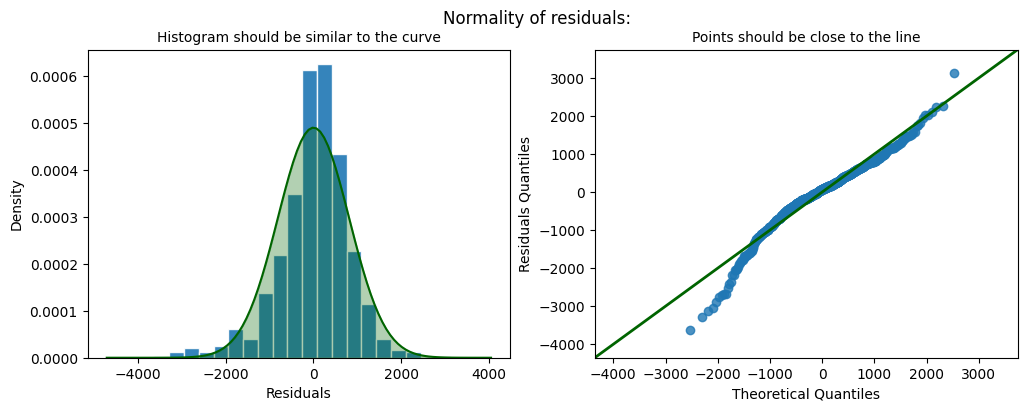

Homocedasticity tests results:
- Heteroscedasticity (non-constant error variance) detected according to Breusch-Pagan test (p-value = 0.000).
- Heteroscedasticity (non-constant error variance) detected according to White test (p-value = 0.000).
- Heteroscedasticity (non-constant error variance) detected according to Goldfeld-Quandt test (p-value = 0.000).


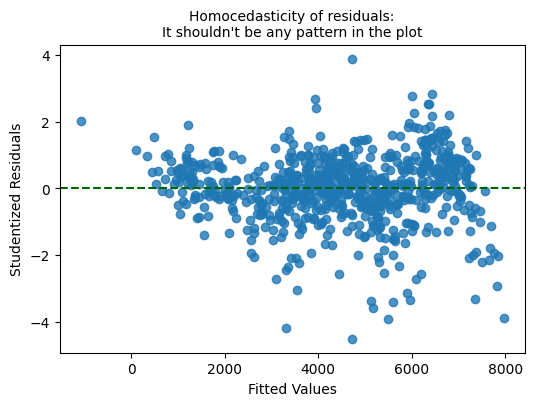

Independence tests results:
- Residuals appear to be independent and not autocorrelated according to Durbin-Watson test (p-value = 0.552).
- Autocorrelated residuals detected according to Box-Pierce test (p-value = 0.000).
- Autocorrelated residuals detected according to Breusch-Godfrey test (p-value = 0.000).


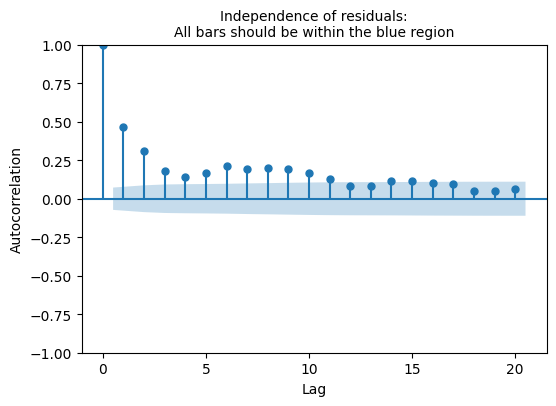

Multicollinearity test results:
- The model may have multicollinearity problems (condition number = 8,224,777.52).


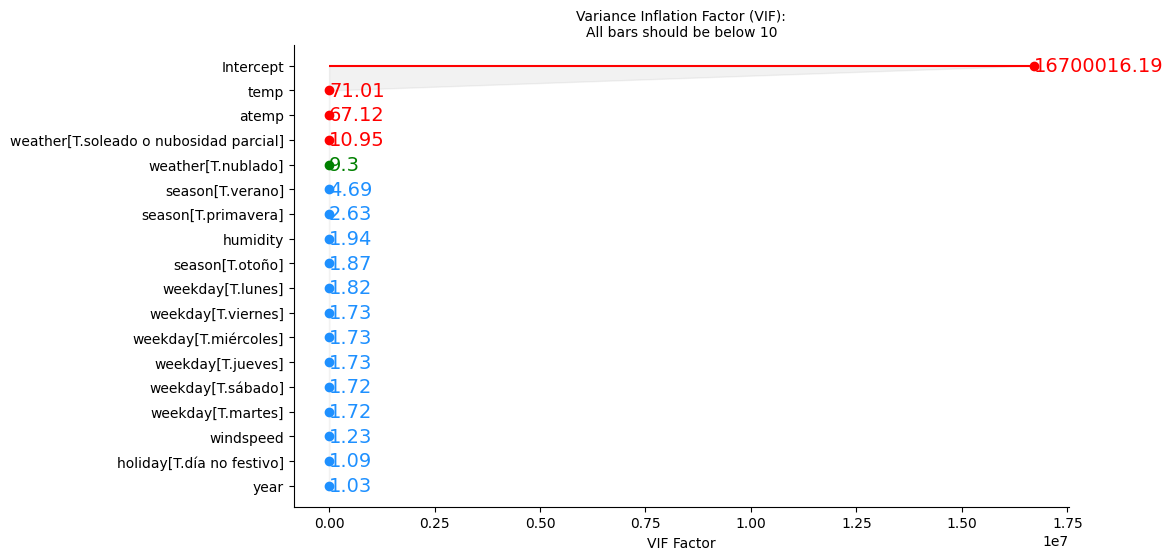

In [26]:
# chequear si el modelo cumple con los supuestos de normalidad y homocedasticidad
checker = CheckModel(modelo_seleccionado)
checker.check_all()

In [27]:
# respecto a la normalidad, los residuales tienen una cola pesada y no se ajustan a la campana
# tampoco pasaron los test de hipotesis respectivos

# sobre la homocedasticidad, se ve una varianza visualmente que no se mantiene constante y que aumenta en
# ciertas secciones del gráfico, tampoco paso ninguno de los test de homocedasticidad.

# adicionalmente, podemos ver que existe alta correlacion de los errores al menos en 10 primeros valores
# por lo que tampoco pasaria la independencia de errores.

# Existe alta multicolinealidad, la cual es esperable dado que al considerar (n-1) variables categoricas
# para el modelo, los efectos de las no consideradas pasan al intercepto, generando este efecto.

# en resumen, el modelo no cumple con los supuestos requeridos, y no es adecuado para efectuar predicciones


### 1.6.2 Predicción del modelo

In [28]:
# creo el dataframe con los datos de la prediccion a realizar
data_prediccion = pd.DataFrame([
    {"season": 'primavera', "year": 2011, "holiday": "día festivo", "weekday": "sábado", "workingday": "día no laboral",
     "weather": "nublado", "temp": 12, "atemp": 11, "humidity": 66.3, "windspeed": 12.5}
])

data_prediccion

,season,year,holiday,weekday,workingday,weather,temp,atemp,humidity,windspeed
0,primavera,2011,día festivo,sábado,día no laboral,nublado,12,11,66.3,12.5


In [29]:
# hago la prediccion
modelo_seleccionado.predict(data_prediccion)

0    2618.702622
dtype: float64

In [30]:
# para las condiciones dadas, la predicción es de 3275 arriendos de bicicletas aproximadamente

Para R: performance::check_model(modelo_1) para hacer graficos mas bonitos para las regresiones

## 2. Serie de tiempo

In [31]:
# esta sección la haré en R, usando R-studio. Revisar el script que haré para agregar esto al informe

In [32]:
# Se extraen los residuales
serie_residuales = modelo_seleccionado.resid
# ahora las fechas
serie_fechas = data['date']

# lo concateno en un dataframe
serie_residuales_fechas = pd.concat([serie_fechas, serie_residuales], axis=1)
serie_residuales_fechas.rename(columns={0: 'residuales'}, inplace=True)
serie_residuales_fechas.head()

,date,residuales
0,2011-01-01,-667.736830
1,2011-01-02,-369.242345
2,2011-01-03,71.517225
3,2011-01-04,104.459401
4,2011-01-05,-174.372106


In [33]:
# exporto este dataframe como csv para trabajarlo en R
serie_residuales_fechas.to_csv('serie_residuales_fechas.csv', index=False)

In [ ]:
# lista esta seccion en R

# 3. Regresion Logistica

In [34]:
!pip install estyp

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
# importar los datos
lluvia = pd.read_excel('lluvia.xlsx')
# lluvia = pd.read_excel('/content/drive/MyDrive/lluvia.xlsx')

lluvia.head()

,MinTemp,MaxTemp,Lluvia,Evaporacion,Sol,VelRafaga,Vel9am,Vel3pm,Hum9am,Hum3pm,Pres9am,Pre3pm,Nub9am,Nub3pm,Temp9am,Temp3pm,LluviaHoy,LluviaMan,Koppen,Estacion
0,7.6,19.3,0.0,3.4,9.4,35,13,13,73,32,1018.6,1015.4,1,1,9.4,18.8,No,No,Subtropical,Invierno
1,6.8,19.5,0.0,3.4,9.4,46,19,28,67,42,1018.4,1015.2,1,1,11.9,17.9,No,No,Subtropical,Invierno
2,5.5,13.9,0.0,2.8,3.8,44,26,13,72,58,1017.8,1015.5,7,7,8.1,12.2,No,No,Temperate,Invierno
3,8.6,14.3,0.0,2.8,3.8,35,13,17,67,56,1017.4,1015.0,7,7,9.3,13.4,No,Yes,Temperate,Invierno
4,7.9,13.0,0.0,2.8,3.8,39,15,17,68,69,1017.6,1015.3,7,7,9.0,11.7,No,No,Temperate,Invierno


# 3.1. Pregunta 1.

In [36]:
# codificacion
lluvia["LluviaMan"] = np.where(lluvia["LluviaMan"] == "Yes", 1, 0)

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
import statsmodels.api as sm

In [79]:
# set de prueba y entrenamiento, además fijamos la semilla
train_data, test_data = train_test_split(lluvia, test_size=0.2, random_state=2024)

# 3.2. Pregunta 2. 

In [40]:
especificacion = sm.Logit.from_formula(
    formula = """
    LluviaMan ~ Evaporacion
    """,
    data = lluvia
)
modelo = especificacion.fit()
modelo.summary2()

Optimization terminated successfully.
         Current function value: 0.517533
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Method:           MLE        
Dependent Variable: LluviaMan        Pseudo R-squared: 0.018      
Date:               2024-08-16 18:25 AIC:              58402.4256 
No. Observations:   56420            BIC:              58420.3067 
Df Model:           1                Log-Likelihood:   -29199.    
Df Residuals:       56418            LL-Null:          -29747.    
Converged:          1.0000           LLR p-value:      4.4478e-240
No. Iterations:     6.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
Intercept     -0.7301    0.0190  -38.4515  0.0000  -0.7673  -0.6929
Evaporacion   -0.1040    0.0033  -31.2296  0.0000  -0.1106  -0.0975
==================================================================

"""

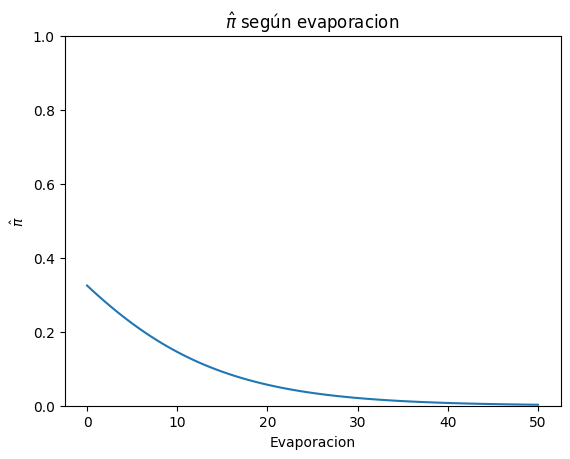

In [41]:
# Esto es para mostrar que con la evaporacion baja la posibilidad de lluvia

def pi(evaporacion):
    exp = np.exp(-0.7301 -0.1040 * evaporacion)
    return exp / (1 + exp)

evaporaciones = np.linspace(0, 50, 100)
probs_lluviaman  = pi(evaporaciones)

sns.lineplot(x=evaporaciones, y=probs_lluviaman)
plt.title(r"$\hat\pi$ según evaporacion")
plt.xlabel("Evaporacion")
plt.ylabel(r"$\hat\pi$")
plt.ylim(0, 1);

In [42]:
from estyp.testing import t_test

display(t_test(lluvia.query("LluviaMan == 1").Evaporacion, lluvia.query("LluviaMan == 0").Evaporacion))

ic95_odds_ratio = np.exp(modelo.conf_int().iloc[1:, :])
ic95_odds_ratio.columns = ["[2.5%", "97.5%]"]

print("- Intervalo de confianza al 95% para los Odds Ratio:")
display(ic95_odds_ratio)


    Welch's Two Sample t-test
    T = -34.5127 | df = 23556.25 | p-value = <0.0001
    alternative hypothesis: true difference in means is not equal to 0
    95 percent confidence interval:
     -1.225350 -1.093648
    sample estimates:
      [mean of x, mean of y]: [4.599026, 5.758525]
    

- Intervalo de confianza al 95% para los Odds Ratio:


,[2.5%,97.5%]
Evaporacion,0.895328,0.907097


In [43]:
# segun esto, la variable de evaporacion si es significativa para explicar si llovera o no mañana

In [44]:
odds_ratio = np.exp(modelo.params[1:])
print(f"Evaporacion: {odds_ratio}")

Evaporacion: Evaporacion    0.901193
dtype: float64


In [45]:
# es un factor riesgo y a mayor evaporacion, aumentan las chances de que llueva mañana

# 3.3. Pregunta 3. 

In [46]:
from estyp.linear_model import Stepwise

In [47]:
searcher = Stepwise(
    formula = """
     LluviaMan ~ 1
    """,
    data      = train_data,
    model     = sm.Logit,
    direction = "both",
    criterion = "aic"
)
searcher.fit()

Starting AIC: 47648.1079
- Term "Hum3pm" added | AIC: 37098.1461
- Term "VelRafaga" added | AIC: 34148.5916
- Term "Sol" added | AIC: 32643.2170
- Term "Pre3pm" added | AIC: 31261.6176
- Term "Pres9am" added | AIC: 31001.8108
- Term "LluviaHoy" added | AIC: 30732.3804
- Term "Nub3pm" added | AIC: 30547.8454
- Term "Vel3pm" added | AIC: 30379.9881
- Term "Koppen" added | AIC: 30232.7694
- Term "Vel9am" added | AIC: 30182.2738
- Term "Estacion" added | AIC: 30148.8152
- Term "Lluvia" added | AIC: 30137.8879
- Term "MaxTemp" added | AIC: 30135.1241
- Term "MinTemp" added | AIC: 30084.5702
- Term "Hum9am" added | AIC: 30081.5606
- Term "Temp9am" added | AIC: 30081.1809
Both selection completed
- Obtained AIC: 30081.1809
- Dropped terms: 0
- Added terms: 16
- Obtained formula: "LluviaMan ~ Hum3pm + VelRafaga + Sol + Pre3pm + Pres9am + LluviaHoy + Nub3pm + Vel3pm + Koppen + Vel9am + Estacion + Lluvia + MaxTemp + MinTemp + Hum9am + Temp9am"


In [48]:
# resumen del modelo de regresion
especificacion = sm.Logit.from_formula(
    formula = searcher.optimal_formula_,
    data = train_data
)
modelo = especificacion.fit()
modelo.summary2()

Optimization terminated successfully.
         Current function value: 0.332763
         Iterations 7


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                 Logit             Method:            MLE       
Dependent Variable:    LluviaMan         Pseudo R-squared:  0.370     
Date:                  2024-08-16 18:28  AIC:               30081.1809
No. Observations:      45136             BIC:               30264.2471
Df Model:              20                Log-Likelihood:    -15020.   
Df Residuals:          45115             LL-Null:           -23823.   
Converged:             1.0000            LLR p-value:       0.0000    
No. Iterations:        7.0000            Scale:             1.0000    
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
Intercept             64.0876   2.8294  22.6507 0.0000 58.5421 69.6331
LluviaHoy[T.Yes]       0.4801   0.0401  11.9693 0.0000  0.4015  0.5587
Koppen[T.Grassland]    0.0622   0.1515   0.4103 0.6816 -0.2348  0.3592
Koppen[T.Subtropical]  0.4813   0.1378   3.4930 0.0005  0.2112  0.7514
Koppen[T.Temperate]    0.0649   0.1369   0.4740 0.6355 -0.2034  0.3332
Estacion[T.Otoño]      0.0490   0.0451   1.0863 0.2773 -0.0394  0.1374
Estacion[T.Primavera]  0.0818   0.0456   1.7938 0.0729 -0.0076  0.1712
Estacion[T.Verano]    -0.1946   0.0548  -3.5485 0.0004 -0.3020 -0.0871
Hum3pm                 0.0561   0.0015  36.6820 0.0000  0.0531  0.0591
VelRafaga              0.0579   0.0017  33.1442 0.0000  0.0545  0.0614
Sol                   -0.1402   0.0063 -22.2793 0.0000 -0.1525 -0.1279
Pre3pm                -0.1906   0.0088 -21.5814 0.0000 -0.2079 -0.1733
Pres9am                0.1201   0.0088  13.6331 0.0000  0.1029  0.1374
Nub3pm                 0.1266   0.0091  13.9004 0.0000  0.1088  0.1445
Vel3pm                -0.0238   0.0025  -9.6613 0.0000 -0.0286 -0.0189
Vel9am                -0.0119   0.0023  -5.0970 0.0000 -0.0165 -0.0073
Lluvia                 0.0072   0.0023   3.1332 0.0017  0.0027  0.0117
MaxTemp                0.0372   0.0085   4.3907 0.0000  0.0206  0.0539
MinTemp               -0.0497   0.0081  -6.1099 0.0000 -0.0656 -0.0337
Hum9am                 0.0043   0.0016   2.7176 0.0066  0.0012  0.0075
Temp9am                0.0184   0.0119   1.5423 0.1230 -0.0050  0.0418
======================================================================

"""

In [49]:
# lista de predictores considerados en la regresion logistica
# Estos no fueron considerados
                          # + Evaporacion
                          # + Nub9am
                          # + Temp3pm
searcher.optimal_variables_

['LluviaHoy[T.Yes]',
 'Koppen[T.Grassland]',
 'Koppen[T.Subtropical]',
 'Koppen[T.Temperate]',
 'Estacion[T.Otoño]',
 'Estacion[T.Primavera]',
 'Estacion[T.Verano]',
 'Hum3pm',
 'VelRafaga',
 'Sol',
 'Pre3pm',
 'Pres9am',
 'Nub3pm',
 'Vel3pm',
 'Vel9am',
 'Lluvia',
 'MaxTemp',
 'MinTemp',
 'Hum9am',
 'Temp9am']

In [50]:
# acá esta el modelo con 'both'
searcher.optimal_formula_

'LluviaMan ~ Hum3pm + VelRafaga + Sol + Pre3pm + Pres9am + LluviaHoy + Nub3pm + Vel3pm + Koppen + Vel9am + Estacion + Lluvia + MaxTemp + MinTemp + Hum9am + Temp9am'

In [51]:
# aqui pruebo si hay algun cambio si la variables categoricas se ingresan por separado
# pero al final no es tan distinto asi que no creo que sea relevante

searcher = Stepwise(
    formula = """
     LluviaMan ~ 1
    """,
    data      = pd.get_dummies(train_data, columns=['Estacion', 'Koppen']),
    model     = sm.Logit,
    direction = "both",
    criterion = "aic"
)
searcher.fit()

# resumen del modelo de regresion
especificacion = sm.Logit.from_formula(
    formula = searcher.optimal_formula_,
    data = pd.get_dummies(train_data, columns=['Estacion', 'Koppen'])
)
modelo_mod = especificacion.fit()
modelo_mod.summary2()

Starting AIC: 47648.1079
- Term "Hum3pm" added | AIC: 37098.1461
- Term "VelRafaga" added | AIC: 34148.5916
- Term "Sol" added | AIC: 32643.2170
- Term "Pre3pm" added | AIC: 31261.6176
- Term "Pres9am" added | AIC: 31001.8108
- Term "LluviaHoy" added | AIC: 30732.3804
- Term "Nub3pm" added | AIC: 30547.8454
- Term "Koppen_Subtropical" added | AIC: 30379.0399
- Term "Vel3pm" added | AIC: 30229.4014
- Term "Vel9am" added | AIC: 30178.6465
- Term "Estacion_Verano" added | AIC: 30147.5696
- Term "Lluvia" added | AIC: 30136.3169
- Term "MaxTemp" added | AIC: 30130.3041
- Term "MinTemp" added | AIC: 30080.0181
- Term "Hum9am" added | AIC: 30077.6206
- Term "Temp9am" added | AIC: 30076.6808
- Term "Estacion_Invierno" added | AIC: 30076.0088
Both selection completed
- Obtained AIC: 30076.0088
- Dropped terms: 0
- Added terms: 17
- Obtained formula: "LluviaMan ~ Hum3pm + VelRafaga + Sol + Pre3pm + Pres9am + LluviaHoy + Nub3pm + Koppen_Subtropical + Vel3pm + Vel9am + Estacion_Verano + Lluvia + M

<class 'statsmodels.iolib.summary2.Summary'>
"""
                              Results: Logit
===========================================================================
Model:                  Logit               Method:              MLE       
Dependent Variable:     LluviaMan           Pseudo R-squared:    0.370     
Date:                   2024-08-16 18:32    AIC:                 30076.0088
No. Observations:       45136               BIC:                 30232.9226
Df Model:               17                  Log-Likelihood:      -15020.   
Df Residuals:           45118               LL-Null:             -23823.   
Converged:              1.0000              LLR p-value:         0.0000    
No. Iterations:         7.0000              Scale:               1.0000    
---------------------------------------------------------------------------
                            Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
---------------------------------------------------------------------------
Intercept                  64.4191   2.8138  22.8943 0.0000 58.9043 69.9340
LluviaHoy[T.Yes]            0.4809   0.0401  11.9986 0.0000  0.4024  0.5595
Koppen_Subtropical[T.True]  0.4182   0.0323  12.9653 0.0000  0.3550  0.4814
Estacion_Verano[T.True]    -0.2583   0.0409  -6.3098 0.0000 -0.3385 -0.1781
Estacion_Invierno[T.True]  -0.0654   0.0400  -1.6331 0.1025 -0.1438  0.0131
Hum3pm                      0.0562   0.0015  36.8782 0.0000  0.0532  0.0591
VelRafaga                   0.0580   0.0017  33.1730 0.0000  0.0545  0.0614
Sol                        -0.1397   0.0063 -22.3080 0.0000 -0.1520 -0.1275
Pre3pm                     -0.1910   0.0088 -21.6547 0.0000 -0.2083 -0.1737
Pres9am                     0.1203   0.0088  13.6617 0.0000  0.1031  0.1376
Nub3pm                      0.1268   0.0091  13.9376 0.0000  0.1090  0.1447
Vel3pm                     -0.0237   0.0025  -9.6614 0.0000 -0.0285 -0.0189
Vel9am                     -0.0120   0.0023  -5.1043 0.0000 -0.0165 -0.0074
Lluvia                      0.0072   0.0023   3.1417 0.0017  0.0027  0.0117
MaxTemp                     0.0366   0.0084   4.3452 0.0000  0.0201  0.0531
MinTemp                    -0.0505   0.0081  -6.2505 0.0000 -0.0663 -0.0347
Hum9am                      0.0043   0.0016   2.6955 0.0070  0.0012  0.0074
Temp9am                     0.0194   0.0119   1.6404 0.1009 -0.0038  0.0427
===========================================================================

"""

# 3.4. Pregunta 4.

In [52]:
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score, accuracy_score

In [53]:
import sklearn.metrics as metrics

In [80]:
from scipy import stats

In [54]:
# base entrenamiento

In [55]:
entrenamiento_data = train_data[["Hum3pm","VelRafaga","Sol","Pre3pm","Pres9am","LluviaHoy","Nub3pm"
,"Vel3pm","Koppen","Vel9am","Estacion","Lluvia","MaxTemp","MinTemp","Hum9am","Temp9am"]]

In [56]:
# obtener el vector de probabilidades
prediccion_train_data = modelo.predict(entrenamiento_data).to_numpy()
reales_train_data = train_data["LluviaMan"].to_numpy()

# prediccion_train_data = modelo_mod.predict(pd.get_dummies(train_data, columns=['Estacion', 'Koppen'])).to_numpy()
# reales_train_data = pd.get_dummies(train_data, columns=['Estacion', 'Koppen'])["LluviaMan"].to_numpy()

In [57]:
prediccion_train_data

array([0.24696094, 0.12436547, 0.18898501, ..., 0.02676236, 0.08974823,
       0.01266954])

In [58]:
reales_train_data

array([0, 0, 1, ..., 0, 0, 0])

In [59]:
fpr, tpr, thresholds = roc_curve(reales_train_data, prediccion_train_data)
roc_auc = roc_auc_score(reales_train_data, prediccion_train_data)

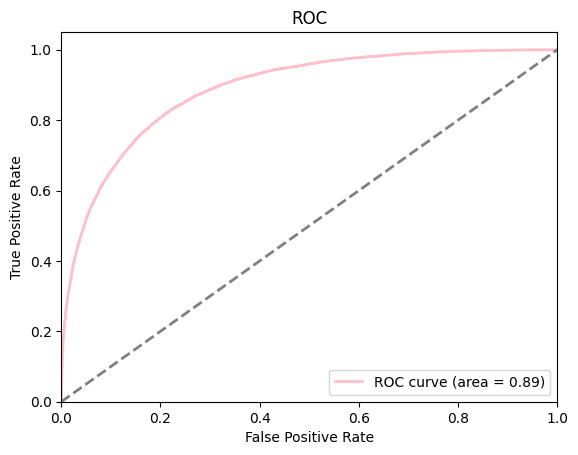

In [60]:
plt.figure()
plt.plot(fpr, tpr, color='pink', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

Estadístico KS: 0.6085
Valor p: 0.0000


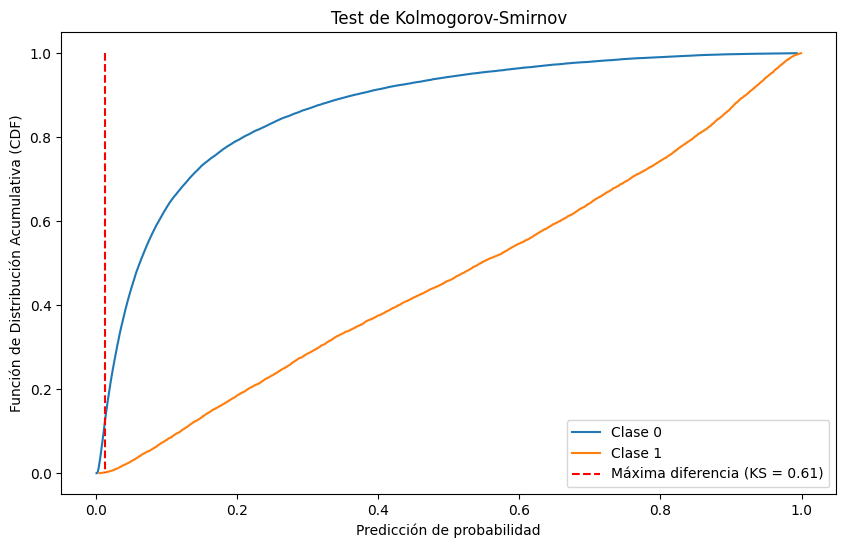

In [81]:
# Test de Kilmogorov-Smirnov

# Calcular el KS
from scipy.stats import ks_2samp
# Filtrar las predicciones para cada clase
pred0 = prediccion_train_data[reales_train_data == 0]
pred1 = prediccion_train_data[reales_train_data == 1]

# Calcular las CDFs empíricas
cdf0 = np.sort(pred0)
cdf1 = np.sort(pred1)

# Obtener los valores de las CDFs
ecdf0 = np.arange(1, len(cdf0)+1) / len(cdf0)
ecdf1 = np.arange(1, len(cdf1)+1) / len(cdf1)

# Graficar las CDFs
plt.figure(figsize=(10, 6))
plt.plot(cdf0, ecdf0, label='Clase 0')
plt.plot(cdf1, ecdf1, label='Clase 1')

ks_statistic, p_value = stats.ks_2samp(pred0, pred1)

# Calcular el Test de Kolmogorov-Smirnov y marcar la diferencia máxima
ks_statistic, p_value = stats.ks_2samp(pred0, pred1)
print(f'Estadístico KS: {ks_statistic:.4f}')
print(f'Valor p: {p_value:.4f}')

# Encontrar la posición donde ocurre la mayor diferencia
# Para esto, usaremos interpolación de la CDF de la clase 1 en los puntos de la CDF de la clase 0
cdf1_interp = np.interp(pred0, pred1, ecdf1)
maxdiff_idx = np.argmax(np.abs(ecdf0 - cdf1_interp))
maxdiff = np.abs(ecdf0 - cdf1_interp)[maxdiff_idx]

# Marcar la máxima diferencia
plt.vlines(pred0[maxdiff_idx], ecdf0[maxdiff_idx], cdf1_interp[maxdiff_idx], color='red', linestyle='--', label=f'Máxima diferencia (KS = {ks_statistic:.2f})')

# Configurar la gráfica
plt.xlabel('Predicción de probabilidad')
plt.ylabel('Función de Distribución Acumulativa (CDF)')
plt.title('Test de Kolmogorov-Smirnov')
plt.legend(loc='best')
plt.show()


In [61]:
roc_curve(reales_train_data, prediccion_train_data)

(array([0.        , 0.        , 0.        , ..., 0.97535111, 0.97535111,
        1.        ]),
 array([0.00000000e+00, 1.00381450e-04, 3.51335073e-03, ...,
        9.99899619e-01, 1.00000000e+00, 1.00000000e+00]),
 array([       inf, 0.99928967, 0.99353532, ..., 0.00544622, 0.00544112,
        0.00126176]))

In [62]:
sensitivity = tpr
specificity = 1 - fpr
cutoff_index = np.where(sensitivity >= 0.8)[0][-1] # Aqui hay que elegir la posicion 0 y no -1, porque ahi esta la minima tpr y minimina fpr (que es maxima especificidad)
cutoff_threshold = thresholds[cutoff_index]

In [63]:
from sklearn.metrics import classification_report

cutoff_index = np.where(sensitivity >= 0.8)[0][0]
cutoff_threshold = thresholds[cutoff_index]
print(f"Punto de corte con sensibilidad mínima del 80%: {cutoff_threshold}")

reales_train_data = train_data["LluviaMan"].to_numpy()
prediccion_train_data = modelo.predict(train_data).to_numpy()
LluviaMan_predichas = np.where(prediccion_train_data >= cutoff_threshold, 1, 0)

print(classification_report(reales_train_data, LluviaMan_predichas))

Punto de corte con sensibilidad mínima del 80%: 0.21558251881738663
              precision    recall  f1-score   support

           0       0.93      0.81      0.87     35174
           1       0.54      0.80      0.64      9962

    accuracy                           0.80     45136
   macro avg       0.74      0.80      0.75     45136
weighted avg       0.85      0.80      0.82     45136



In [64]:
confusion_matrix(reales_train_data, prediccion_train_data >= cutoff_threshold)

array([[28345,  6829],
       [ 1992,  7970]], dtype=int64)

# 3.5. Pregunta 5

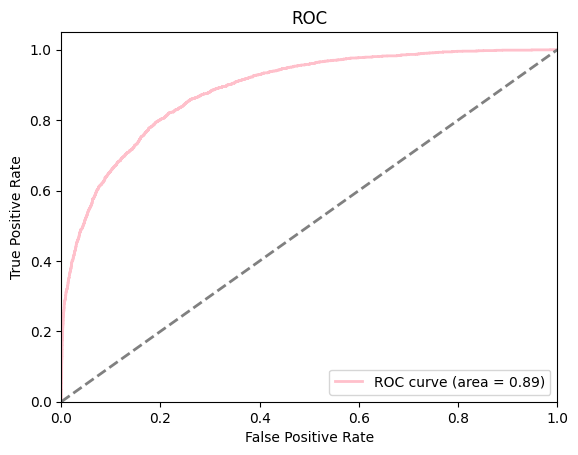

Punto de corte con sensibilidad mínima del 80%: 0.20983643838989366
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      8819
           1       0.53      0.80      0.64      2465

    accuracy                           0.80     11284
   macro avg       0.73      0.80      0.75     11284
weighted avg       0.85      0.80      0.81     11284



In [65]:
# AQUI SOLO REPIDO LO QE HICIMOS PERO PARA EL TEST

from sklearn.metrics import classification_report


reales_test_data = test_data["LluviaMan"].to_numpy()
prediccion_test_data = modelo.predict(test_data).to_numpy()

fpr, tpr, thresholds = roc_curve(reales_test_data, prediccion_test_data)
roc_auc = roc_auc_score(reales_test_data, prediccion_test_data)

plt.figure()
plt.plot(fpr, tpr, color='pink', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

sensitivity = tpr
cutoff_index = np.where(sensitivity >= 0.8)[0][0]
cutoff_threshold = thresholds[cutoff_index]
print(f"Punto de corte con sensibilidad mínima del 80%: {cutoff_threshold}")

LluviaMan_predichas = np.where(prediccion_test_data >= cutoff_threshold, 1, 0)

print(classification_report(reales_test_data, LluviaMan_predichas))

Estadístico KS: 0.6034
Valor p: 0.0000


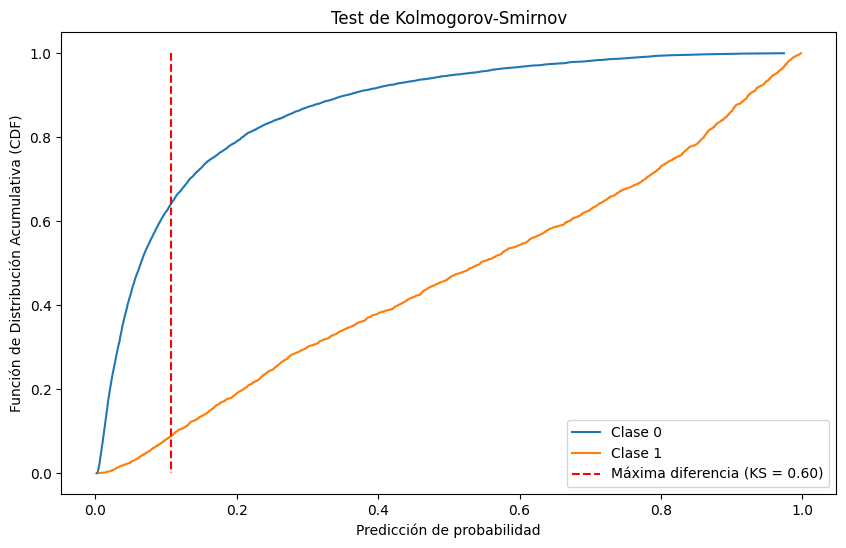

In [82]:
## Test de Kilmogorov-Smirnov

# Calcular el KS
from scipy.stats import ks_2samp
# Filtrar las predicciones para cada clase
pred_prob_0 = prediccion_test_data[reales_test_data == 0]
pred_prob_1 = prediccion_test_data[reales_test_data == 1]

# Calcular las CDFs empíricas
cdf_0 = np.sort(pred_prob_0)
cdf_1 = np.sort(pred_prob_1)

# Obtener los valores de las CDFs
ecdf_0 = np.arange(1, len(cdf_0)+1) / len(cdf_0)
ecdf_1 = np.arange(1, len(cdf_1)+1) / len(cdf_1)

# Graficar las CDFs
plt.figure(figsize=(10, 6))
plt.plot(cdf_0, ecdf_0, label='Clase 0')
plt.plot(cdf_1, ecdf_1, label='Clase 1')

ks_statistic, p_value = stats.ks_2samp(pred_prob_0, pred_prob_1)

# Calcular el Test de Kolmogorov-Smirnov y marcar la diferencia máxima
ks_statistic, p_value = stats.ks_2samp(pred_prob_0, pred_prob_1)
print(f'Estadístico KS: {ks_statistic:.4f}')
print(f'Valor p: {p_value:.4f}')

# Encontrar la posición donde ocurre la mayor diferencia
# Para esto, usaremos interpolación de la CDF de la clase 1 en los puntos de la CDF de la clase 0
cdf_1_interp = np.interp(pred_prob_0, pred_prob_1, ecdf_1)
max_diff_idx = np.argmax(np.abs(ecdf_0 - cdf_1_interp))
max_diff = np.abs(ecdf_0 - cdf_1_interp)[max_diff_idx]

# Marcar la máxima diferencia
plt.vlines(pred_prob_0[max_diff_idx], ecdf_0[max_diff_idx], cdf_1_interp[max_diff_idx], color='red', linestyle='--', label=f'Máxima diferencia (KS = {ks_statistic:.2f})')

# Configurar la gráfica
plt.xlabel('Predicción de probabilidad')
plt.ylabel('Función de Distribución Acumulativa (CDF)')
plt.title('Test de Kolmogorov-Smirnov')
plt.legend(loc='best')
plt.show()


In [66]:
confusion_matrix(reales_test_data, prediccion_test_data >= cutoff_threshold)

array([[7075, 1744],
       [ 493, 1972]], dtype=int64)

## 3.6. Pregunta 6

In [78]:
data = {'MinTemp': [7],
        'MaxTemp': [18],
        'Lluvia': [0],
        'Evaporacion': [7],
        'Sol': [12],
        'VelRafaga': [72],
        'Vel9am': [10],
        'Vel3pm': [54],
        'Hum9am': [65],
        'Hum3pm': [77],
        'Pres9am': [1001],
        'Pre3pm': [1025],
        'Nub9am': [3],
        'Nub3pm': [2],
        'Temp9am': [11.4],
        'Temp3pm': [16.2],
        'LluviaHoy': ['No'],
        'Koppen': ['Subtropical'],
        'Estacion': ['Primavera']}

dia_mañana = pd.DataFrame(data)

print("- Probabilidades de lluvia mañana según modelo:")
print(modelo.predict(dia_mañana))

- Probabilidades de lluvia mañana según modelo:
0    0.018767
dtype: float64
